# Statistical Pattern Recognition: Assignment 2 
**Title**    : Bayes classifier

**Members**  : Jayanth S, Praveen Kumar N, Rishabh Roy





# **Problem 2:**

Read and implement Multinomial Naive Bayes classifier on 20 Newsgroups Dataset. Compare it with sklearn implementation of Multinomial Naive Bayes Classifier.

DATASET SOURCE:http://qwone.com/~jason/20Newsgroups/

**Background:**

* Dataset consists of 18,886 files(11,334 for Training and 7,552 for Testing) of 20 different categories.

* The data is organized into 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other, while others are highly unrelated. Here is a list of the 20 newsgroups.


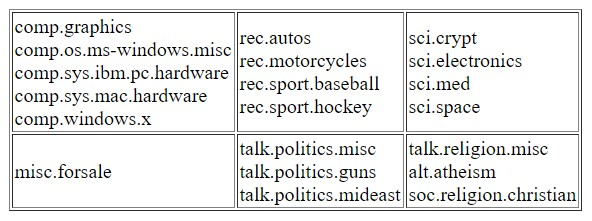

## **Importing and Analysing Dataset:**

### Importing:

#### Method 1:

In [ ]:
################################## Method 1 ####################################

# Importing Dataset directly from sklearn.datasets 

from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset ="train",shuffle=True) # loading all Training data(files and labels)
test_data  = fetch_20newsgroups(subset ="test",shuffle=True)  # loading all Testing data(files and labels)

# # If we want to read all the data of selected categories and 
# # then split into train and test data, we can do it using following code.

# from sklearn.model_selection import train_test_split
# Categories                                    = ["alt.atheism","comp.graphics","sci.med"]
# all_data                                      = fetch_20newsgroups(subset="all",categories=Categories,shuffle=True)
# train_news,test_news,train_labels,test_labels = train_test_split(all_data.data,all_data.target,test_size=0.2,random_state=8,stratify=all_data.target)

#### Method 2:

In [ ]:
################################## Method 2 ####################################

# Importing Dataset from local folder(downloaded from http://qwone.com/~jason/20Newsgroups/)

# import sklearn.datasets as sd

# train_data = sd.load_files('drive/MyDrive/Colab Notebooks/20news-bydate-train') # loading all Training data(files and labels) from the Training dataset folder
# test_data  = sd.load_files('drive/MyDrive/Colab Notebooks/20news-bydate-test')  # loading all Testing  data(files and labels) from the Testing dataset folder

# # Choosing data realted to these categories for Training and Testing
# categories = ["comp.graphics","rec.motorcycles","sci.electronics","misc.forsale","talk.politics.misc","alt.atheism"]       

# train_data = sd.load_files('drive/MyDrive/Colab Notebooks/20news-bydate-train',categories = categories) # loading selected Training data(files and labels) from the Training dataset folder
# test_data  = sd.load_files('drive/MyDrive/Colab Notebooks/20news-bydate-test',categories = categories)  # loading selected Testing  data(files and labels) from the Testing dataset folder


### Extracting Training and Testing data from Dataset:

In [ ]:
# # Extracting files(news) and corresponding labels(0-19) from the Training and Testing data
# # train_data.target_names gives the different category names in Training data
# # test_data.target_names gives the different category names in Testing data

category_names  = train_data.target_names        # Different category names(20) of the news data
train_news  = train_data.data
train_labels= train_data.target
test_news   = test_data.data
test_labels = test_data.target


### Analysis of the extracted Training and Testing data:

Number of news(files) in Training data :11314

Number of news(files) in Testing data  :7532



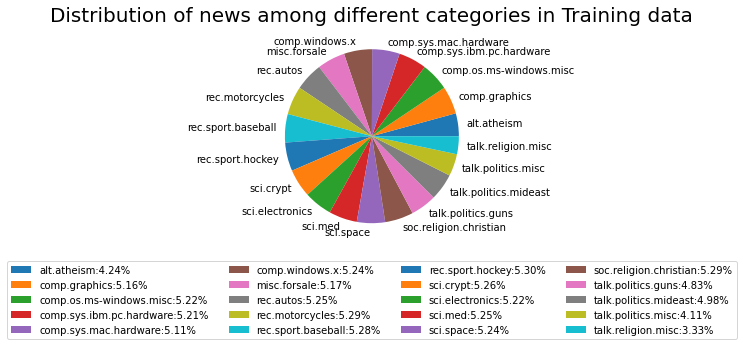

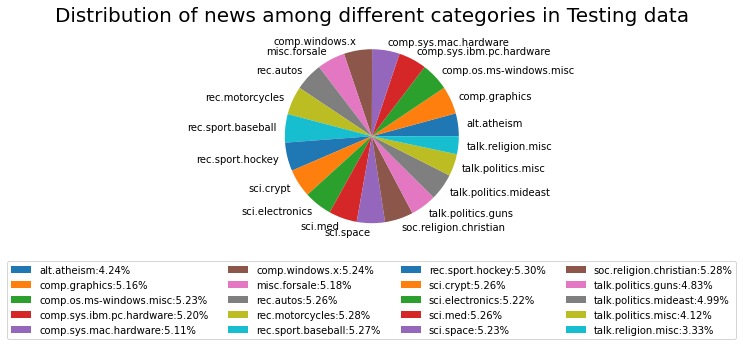

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Finding the number of Training and Testing news(files)
num_train_news = len(train_news)
num_test_news  = len(test_news)

# Finding the probabilities of each category in the Training and Testing data
prob_cat_train = [np.count_nonzero(train_labels == cat)/len(train_labels) for cat in np.unique(train_labels)]
prob_cat_test  = [np.count_nonzero(test_labels == cat)/len(test_labels) for cat in np.unique(train_labels)]

# print(f"Different categories of the news data : {category_names}\n")
print(f"Number of news(files) in Training data :{num_train_news}\n")
print(f"Number of news(files) in Testing data  :{num_test_news}\n")

plt.pie([p*100 for p in prob_cat_train], labels = category_names)
plt.title("Distribution of news among different categories in Training data",fontsize=20)
plt.legend(["{}:{:.2f}%".format(c,p*100) for c,p in zip(tuple(category_names),tuple(prob_cat_train))],loc='upper center',bbox_to_anchor=(0.5, -0.05),ncol=4)
plt.show() 
plt.pie([p*100 for p in prob_cat_test], labels = category_names)
plt.title("Distribution of news among different categories in Testing data",fontsize=20)
plt.legend(["{}:{:.2f}%".format(c,p*100) for c,p in zip(tuple(category_names),tuple(prob_cat_test))],loc='upper center',bbox_to_anchor=(0.5, -0.05),ncol=4)
plt.show() 

## **Data Pre-processing:**

### Feature Extraction:

#### Method 1:

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer()   # Creating a object

# # Find different words present in the Training files(news)  
# # create a vocabulary of all these words which are the features
# # Associate each word (feature) in the vocabulary a unique number(token)
# count_vect.fit(train_news)       # fit the Training files(news) 

# # count the number of times a feature(or a word in vocabulary) occurs for each feature
# # and for all Training files(news) 
# # Now each file is represented by a feature vector with number of occurences of features as its entry
# counts  =  count_vect.transform(train_news)

# # count_vect.vocabulary :
# # gives the dictionary of all different words(vocabulary) in the Training files(news) and corresponding tokens(or numbers) associated with that 
# # count_vect.get_feature_names() : 
# # gives the list of features or words in the vocabulary(here each word in the vocabulary is a feature)

## -------------------------------------------------------------------------- ##
#  UNCOMMENT THE CODE BELOW TO OBTAIN FUNCTIONALITY OF CODE WRITTEN ABOVE
## -------------------------------------------------------------------------- ##

# # Instead of doing fit and transform separately we can do it at a time

# train_news_worc  =  count_vect.fit_transform(train_news)
# train_news_worc.shape

# from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_trans = TfidfTransformer()    # Creating a object

# train_news_tfidf  =  tfidf_trans.fit_transform(train_news_worc)
# train_news_tfidf.shape

## -------------------------------------------------------------------------- ##
#  RUN THE CELL BELOW TO OBTAIN FUNCTIONALITY OF CODE WRITTEN ABOVE
## -------------------------------------------------------------------------- ##

# Instead of using 'CountVectorizer' and 'TfidfTransformer' separately we can use 
# 'TfidfVectorizer' which will do both the work

#### Method 2(Alternate Method):

In [ ]:
# Extracting the features and representing each files(news) using this feature

from sklearn.feature_extraction.text import TfidfVectorizer

# create a tfidfvectorizer object which creates vocabulary(collection of all different words) 
# and feature vector(with words in vocabulary as the features ) for each news(file)
# we can add stop_words = "english" to remove stop words(commonly used words) in english
# such as “the”, “a”, “an”, “in” from vocabulary
tfidf_vect       = TfidfVectorizer(stop_words="english")      

# Representing each file by a feature vector with different words in the 
# Vocabulary as the features and tfidf of the feature(word) as its value
# Here TfIdf :Term frequency inverse document frequency

train_news_featmat = tfidf_vect.fit_transform(train_news)   # Training news data transformed into feature matrix using TFIDF transform 
                                                            # dim(train_news_featmat) = num_train_news X num_features
num_features       = train_news_featmat.shape[1]
print(f"Number of features extracted(Number of words in the vocabulary) : {num_features}\n")

Number of features extracted(Number of words in the vocabulary) : 129796



## **Building Multinomial Naive Bayes classifier:**

* Here we have M(11314) number of training data(files) with class labels, distributed among K(20) classes.
* First we estimate prior probabilities(class probabilities) $P(C_k)$ for all $k=1,\dots,K$ from M training examples.
* Then we build a vocabulary(set of all distinct words in training data). here each word in vocabulary is a feature(there are $n$ features).
* Next we transform each training data(file) into a feature vector $X = [x_1,\dots x_n]$.
* Now using training data we estimate $P(X/C_k) = P(x_1/C_k)\times\dots \times P(x_n/C_k)$(since in Naive bayes classifier we assume features are independent) for all $k=1,\dots,K$.
* Once we have estimated the likelihood of all classes, given a new feature vector $X$ we compute the posterior probability $P(C_k/X) = P(X/C_k)\times P(C_k)/P(X) \propto P(X/C_k)\times P(C_k) $ for all $k=1,\dots,K$.
* Finally we use MAP rule to classify the given new feature vector to the class $C_{NB}$ which maximizes the posterior probability i.e, $C_{NB} = argmax_{C_k} 
P(X/C_k)\times P(C_k).$ 


### Defining function for training the classifier and for predicting:

In [ ]:
def my_MultinomialNB_train(data,labels,alpha):
  
  print(f"Training with {data.shape[0]} Training data...............\n")

  # finding number of features (n) in the feature vector X
  n = data.shape[1]

  # # finding different classes(categories)
  categories = np.unique(labels)

  # finding probabilities of different categories(prior probabilities)
  # P(C_k) = prob_cat[k] ==> probability of category(class) k, estimated from the Training dataset
  est_prob_cat = [np.count_nonzero(labels == cat)/len(labels) for cat in categories]
  
  # (np.count_nonzero(labels == cat) + alpha)/(len(labels)+alpha*len(categories))
  # P_ki is the probabilty of occurence of features x_i's given class C_k
  # x_i is the number of times feature i occurs 

  P_ki_lst = []                                                     # list of probabilities of occurence of features x_i's given a class                                        
  for category in categories:
    
    num_cat_data = np.count_nonzero(labels == category)
    print(f"--> Training with {num_cat_data} category {category} data.....")

    X_cat = np.array([data[row,:].toarray()[0] for row in np.where(labels == category)[0]]) # collection of feature vectors belonging to category = "category"
    X_cat.reshape((num_cat_data,n))                                                         # dim(X_cat) = num_cat_data X n  

    # appending probabilities of occurence of features x_i's, given class = "category"
    # P_ki = (number of files feature(word) x_i present, in category C_k + alpha)/(total number of files in category C_k + alpha * number of features)                                 
    # Here we are use laplace smoothing(with parameter "alpha") while calculating  P_ki, 
    # since there may be no occurence of a feature x_i in the given category
    # which will give probability of occurence of that particular feature x_i = 0
    # this will make P(X/C_k) = 0 , which is not desirable.
    
    P_ki_lst.append([(np.count_nonzero(X_cat[:,i]!=0) +alpha)/(num_cat_data+alpha*n)  for i in range(n)])

  print("\nTraining Done...........")  
  return est_prob_cat,P_ki_lst,categories


def my_MultinomialNB_predict(data,est_prob_cat,P_ki_lst,categories):
  
  # Here given the Testing dataset we need to find the posterior probability 
  # that a given feature vector X belongs to some class C_k: P(C_k/X)
  # then classify the feature vector X to calss C_k for which P(C_k/X) is maximum
  # P(C_k/X) = P(X/C_k)*P(C_k)/P(X)

  # To find P(C_k/X) we need to find likelihood of feature vector X given class C_k: P(X/C_k)
  # here we model P(X/C_k) as Multinomial distribution
  # P(X/C_k) = prod[(P_ki)^x_i] , where P_ki = P(x_i/C_k)
  
  from scipy.sparse import find
  
  print(f"Testing dataset size: {data.shape} ...............\n")
  print(f"Testing with {data.shape[0]} Testing data...............\n")

  predicted_labels = []                         # list for predicted labels
  for i in range(data.shape[0]):

    X_nonzero_lst = list(find(data[i,:]))       # finding nonzero element indices(i,nz_col) and corresponding nonzero values(list) from i-th feature vector
    X_values      = X_nonzero_lst.pop()         # extracting nonzero values
    X             = []                          # list containing position and value of nonzero feature in selected i-th feature vector
    for cind in range(len(X_nonzero_lst[0])) :
      X.append((X_nonzero_lst[1][cind],X_values[cind]))  
    

    # Now find posterior probability for all the categories given this feature vector

    post_prob_lst = []
    for category in categories:

      P_ki = P_ki_lst[category]                 # select the probabilty vector for selected category = "category"

      # Computing P(X/C_k)
      likelihood_of_category = np.prod([P_ki[ind]**x_i for ind,x_i in X]) 

      # Computing P(C_k/X) = P(X/C_k)*P(C_k) and appending to post_prob_lst 
      post_prob              = likelihood_of_category * est_prob_cat[category]
      post_prob_lst.append(post_prob)
    
    # finding the category for which posterior probability is maximum
    # and appending that category as predicted category(label)
    predicted_labels.append(np.argmax(post_prob_lst))
   
  print("\nTesting Done...........") 
  return predicted_labels


### Training the classifier:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tfidf_vect_m     = TfidfVectorizer(stop_words="english") 
train_news_worc  = tfidf_vect_m.fit_transform(train_news)     

In [ ]:
alpha = 0.05
est_prob_cat,P_ki_lst,categories = my_MultinomialNB_train(train_news_worc,train_labels,alpha)

Training with 11314 Training data...............

--> Training with 480 category 0 data.....
--> Training with 584 category 1 data.....
--> Training with 591 category 2 data.....
--> Training with 590 category 3 data.....
--> Training with 578 category 4 data.....
--> Training with 593 category 5 data.....
--> Training with 585 category 6 data.....
--> Training with 594 category 7 data.....
--> Training with 598 category 8 data.....
--> Training with 597 category 9 data.....
--> Training with 600 category 10 data.....
--> Training with 595 category 11 data.....
--> Training with 591 category 12 data.....
--> Training with 594 category 13 data.....
--> Training with 593 category 14 data.....
--> Training with 599 category 15 data.....
--> Training with 546 category 16 data.....
--> Training with 564 category 17 data.....
--> Training with 465 category 18 data.....
--> Training with 377 category 19 data.....

Training Done...........


### Testing the classifier:

In [ ]:
test_news_worc  = tfidf_vect_m.transform(test_news)   # converting each news(files) in Testing data into feature vector X
pred_labels     = my_MultinomialNB_predict(test_news_worc,est_prob_cat,P_ki_lst,categories)

Testing dataset size: (7532, 129796) ...............

Testing with 7532 Testing data...............


Testing Done...........


### Analysis of results:

Accuracy of the Multinomial NB classifier with alpha = 0.05: 80.54965480616039 %
 


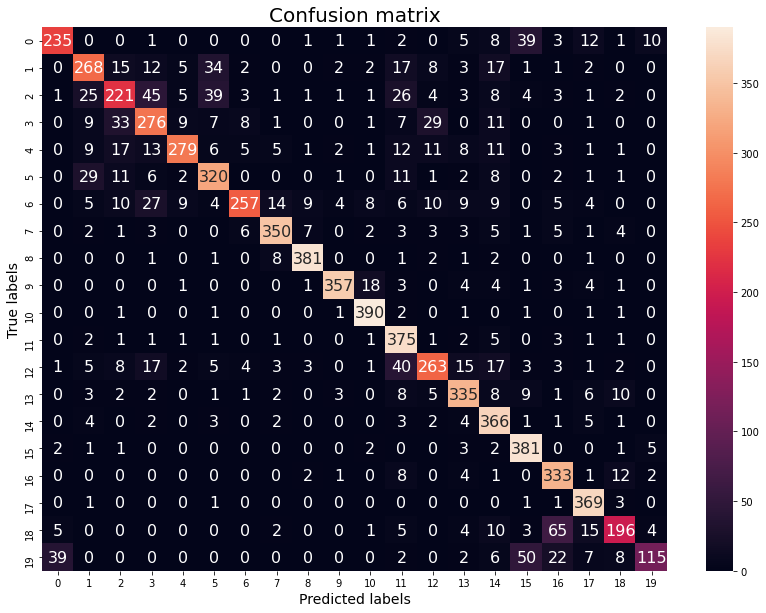

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns

Accuracy = accuracy_score(test_labels,pred_labels)*100
print(f"Accuracy of the Multinomial NB classifier with alpha = {alpha}: {Accuracy} %\n ")

# report   = classification_report(test_labels,pred_labels,target_names=test_data.target_names)
# print("-"*24+" Classification report "+"-"*24+"\n")
# print(report)

conf_mat = confusion_matrix(test_labels,pred_labels)
fig= plt.figure(figsize=(14,10))
sns.heatmap(conf_mat,annot=True,annot_kws={"size":16},fmt="d")
plt.xlabel("Predicted labels",fontsize=14)
plt.ylabel("True labels",fontsize=14)
plt.title("Confusion matrix",fontsize=20)
plt.show()

## **Using in-built Multinomial Naive Bayes classifier:**

### Training the classifier:

In [ ]:
# Import Multinomial NB classifier package from sklearn

from sklearn.naive_bayes import MultinomialNB

alpha = 0.05                                 # Additive (Laplace) smoothing parameter (0 for no smoothing). 
clsfr = MultinomialNB(alpha=alpha)           # create classifier object 
print("Training...............\n")       
clsfr.fit(train_news_featmat, train_labels)  # fit the classifier for Training data

Training...............



MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)

### Testing the classifier:

In [ ]:
print("Testing...............\n")

test_news_featmat  = tfidf_vect.transform(test_news)   # Testing news data transformed into feature matrix using TFIDF transform 
pred_labels        = clsfr.predict(test_news_featmat)

Testing...............



### Analysis of results:

Accuracy of the Multinomial NB classifier with alpha = 0.05: 83.74933616569305 %
 


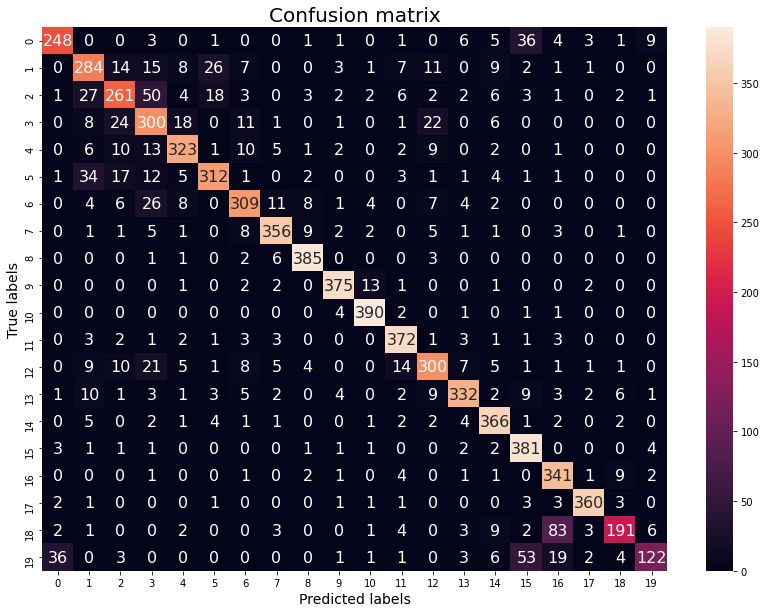

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns

Accuracy = accuracy_score(test_labels,pred_labels)*100
print(f"Accuracy of the Multinomial NB classifier with alpha = {alpha}: {Accuracy} %\n ")

# report   = classification_report(test_labels,pred_labels,target_names=test_data.target_names)
# print("-"*24+" Classification report "+"-"*24+"\n")
# print(report)

conf_mat = confusion_matrix(test_labels,pred_labels)
fig= plt.figure(figsize=(14,10))
sns.heatmap(conf_mat,annot=True,annot_kws={"size":16},fmt="d")
plt.xlabel("Predicted labels",fontsize=14)
plt.ylabel("True labels",fontsize=14)
plt.title("Confusion matrix",fontsize=20)
plt.show()


## **Observations:**

* Accuracy of the In built Multinomial Naive Bayes classifier was around 84%.
* Lower values of alpha(smoothing parameter) gave better accuracy.
* Accuracy of the Multinomial Naive Bayes classifier bulit from scratch was around 81%  